In [157]:
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
#LOAD LIBRARIES 
library(gtools);
library("GenomicRanges");
options(warn=-1)
library(ggplot2)
get_entry_size <- function(entry) {
  return(entry$ChrEnd - entry$ChrStart)
}


statRNA=function(foldChangeDF){
Database=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))>20),]
TazeBig=rownames(temp[which(temp[,2]=="Taze"),])
TazeBigAnnotated=c()
for(i in TazeBig){
TazeBigAnnotated=append(TazeBigAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
ValeBig=rownames(temp[which(temp[,2]=="Vale"),])
ValeBigAnnotated=c()
for(i in ValeBig){
ValeBigAnnotated=append(ValeBigAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}

temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))<20),]
TazeSmall=rownames(temp[which(temp[,2]=="Taze"),])
TazeSmallAnnotated=c()
for(i in TazeSmall){
TazeSmallAnnotated=append(TazeSmallAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
ValeSmall=rownames(temp[which(temp[,2]=="Vale"),])
ValeSmallAnnotated=c()
for(i in ValeSmall){
ValeSmallAnnotated=append(ValeSmallAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
TazeBigAnnotated=unique(TazeBigAnnotated)
ValeBigAnnotated=unique(ValeBigAnnotated)
TazeSmallAnnotated=unique(TazeSmallAnnotated)
ValeSmallAnnotated=unique(ValeSmallAnnotated)

RNA=read.table("/sharedFolder/Data/2_RNA_seq/_counts.txt",header=TRUE,row.names=1,sep="\t")
rownames(RNA)=toupper(rownames(RNA))
indexTazeBig=c()
for(i in c(TazeBigAnnotated,TazeSmallAnnotated)){
indexTazeBig=append(indexTazeBig,grep(i,rownames(RNA)))
}
indexTazeSmall=c()
for(i in c(TazeSmallAnnotated)){
indexTazeSmall=append(indexTazeSmall,grep(i,rownames(RNA)))
}
indexValeBig=c()
for(i in c(ValeBigAnnotated)){
indexValeBig=append(indexValeBig,grep(i,rownames(RNA)))
}
indexValeSmall=c()
for(i in c(ValeSmallAnnotated)){
indexValeSmall=append(indexValeSmall,grep(i,rownames(RNA)))
}
#bT=rowMeans(RNA[indexTazeBig,grep("TAZ",colnames(RNA))])
#sT=rowMeans(RNA[indexTazeSmall,grep("TAZ",colnames(RNA))])
#bV=rowMeans(RNA[indexValeBig,grep("Vale",colnames(RNA))])
#sV=rowMeans(RNA[indexValeSmall,grep("Vale",colnames(RNA))])
    
bT=RNA[indexTazeBig,grep("TAZ",colnames(RNA))]
sT=RNA[indexTazeSmall,grep("TAZ",colnames(RNA))]
bV=RNA[indexValeBig,grep("Vale",colnames(RNA))]
sV=RNA[indexValeSmall,grep("Vale",colnames(RNA))]
t_test_Taze <- t.test(bT, sT)

# Calcola il t-test per Valemetostat
t_test_Vale <- t.test(bV, sV)

log2_fold_change_Taze <- log2(mean(bT) / mean(sT))
log2_fold_change_Vale <- log2(mean(bV) / mean(sV))    
    
# Print results for Tazemetostat
cat("RNA Tazemetostat Big vs Small t-test results:\n")
if(t_test_Taze$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Taze$p.value, ")\n")
  cat("Log2 fold change:", log2_fold_change_Taze, "\n")
} else {
  cat("No significant difference between the groups (p-value:", t_test_Taze$p.value, ")\n")
}

# Print results for Valemetostat
cat("RNA Valemetostat Big vs Small t-test results:\n")
if(t_test_Vale$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Vale$p.value, ")\n")
 cat("Log2 fold change:", log2_fold_change_Vale, "\n")
    
} else {
  cat("No significant difference between the groups (p-value:", t_test_Vale$p.value, ")\n")
}
    
    }




statGroseq=function(foldChangeDF){
results="/sharedFolder/Results/SequencingV2/groSeq"
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))>20),]
TazeBig=rownames(temp[which(temp[,2]=="Taze"),])
ValeBig=rownames(temp[which(temp[,2]=="Vale"),])

temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))<20),]
TazeSmall=rownames(temp[which(temp[,2]=="Taze"),])
ValeSmall=rownames(temp[which(temp[,2]=="Vale"),])


groseq=read.table(paste(results,"/groSeq_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=",")

#bT=rowMeans(RNA[indexTazeBig,grep("TAZ",colnames(RNA))])
#sT=rowMeans(RNA[indexTazeSmall,grep("TAZ",colnames(RNA))])
#bV=rowMeans(RNA[indexValeBig,grep("Vale",colnames(RNA))])
#sV=rowMeans(RNA[indexValeSmall,grep("Vale",colnames(RNA))])
    
bT=groseq[TazeBig,grep("Taze",colnames(groseq))]
sT=groseq[TazeSmall,grep("Taze",colnames(groseq))]
bV=groseq[ValeBig,grep("Vale",colnames(groseq))]
sV=groseq[ValeSmall,grep("Vale",colnames(groseq))]
t_test_Taze <- t.test(bT, sT)

# Calcola il t-test per Valemetostat
t_test_Vale <- t.test(bV, sV)

    
log2_fold_change_Taze <- log2(mean(bT) / mean(sT))
log2_fold_change_Vale <- log2(mean(bV) / mean(sV))    
    
# Print results for Tazemetostat
cat("Groseq Tazemetostat Big vs Small t-test results:\n")
if(t_test_Taze$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Taze$p.value, ")\n")
  cat("Log2 fold change:", log2_fold_change_Taze, "\n")
} else {
  cat("No significant difference between the groups (p-value:", t_test_Taze$p.value, ")\n")
}

# Print results for Valemetostat
cat("Groseq Valemetostat Big vs Small t-test results:\n")
if(t_test_Vale$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Vale$p.value, ")\n")
 cat("Log2 fold change:", log2_fold_change_Vale, "\n")
} else {
  cat("No significant difference between the groups (p-value:", t_test_Vale$p.value, ")\n")
}





}



In [143]:
#SETTING PATH 
pathcutTagMet="/sharedFolder/Data/4_cutTagMet/"
results="/sharedFolder/Results/SequencingV2/cutTagMet"
previousResults="/sharedFolder/Results/Hotspot/"


In [3]:
results

[1] "/sharedFolder/Results/SequencingV2/cutTagMet"

In [4]:
gtf=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
gtf=gtf[grep("Ligase",gtf[,6]),]
gtfEntry=get_entry_size(gtf)
gtf$ChrEnd = gtf$ChrEnd + gtfEntry
gtf$ChrStart = gtf$ChrStart - gtfEntry
a=list.files(pathcutTagMet,pattern=".bedgraph",recursive=TRUE)
uu=grep("sorted",a)
if(length(uu)!=0){
a=a[-uu]
    }
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bedgraph")[[1]][1]})
groseq_count=matrix(0,ncol=length(unique(gtf[,7])),nrow=length(a2))
colnames(groseq_count)=sapply(unique(gtf[,7]),FUN=toString)
rownames(groseq_count)=a2
groseq_rpm=groseq_count
for(j in a){
    system(paste("echo",j))
temp=read.table(paste(pathcutTagMet,"/",j,sep=""),sep="\t")
tempGG=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])),mcols=abs(as.numeric(temp[,4])))
    for(i in seq(nrow(gtf))){
        system(paste("echo",i/nrow(gtf)))
        gg=GRanges(seqnames=as.matrix(gtf[i,1]),ranges=IRanges(start = as.numeric(gtf[i,2]),end=as.numeric(gtf[i,3])))    
        over=findOverlaps(gg,tempGG)@to    
        name=as.vector(noExt((j)))
        groseq_count[name,toString(gtf[i,7])]= sum(tempGG[over]$mcols)
        groseq_rpm[name,toString(gtf[i,7])]= (sum(tempGG[over]$mcols)/sum(abs(temp[,4])))*1000000

   }

}
write.table((t(groseq_count)),paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),col.names=NA,sep=",")
write.table((t(groseq_rpm)),paste(results,"/cutTagMet_AID_Heatmap_RPM.csv",sep=""),col.names=NA,sep=",")


[1] "RAW"
P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 9.309125e-43 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 5.890802e-41 


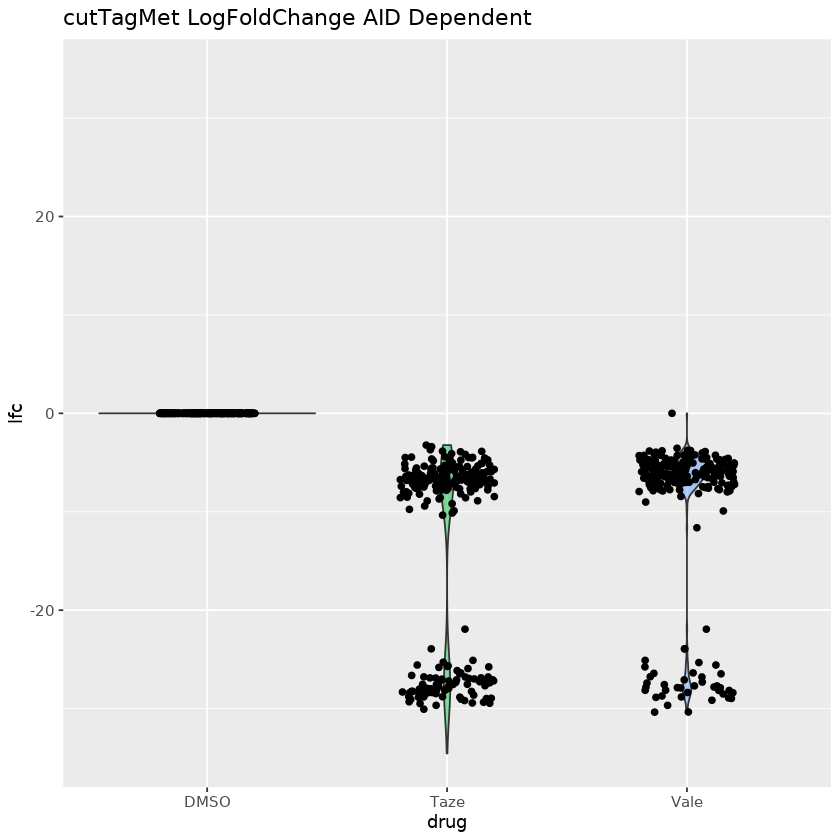

In [5]:
print("RAW")
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
cutTagMet_newrpm=as.matrix(read.table(paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=","))
data=log2(cutTagMet_newrpm+1)

filterVale=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/Lig_DMSOVale.csv",header=TRUE,row.names=1,sep=",")))
filterVale=unlist(sapply(filterVale,FUN=function(x){toString(x)}))

filterTaze=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/Lig_DMSOTaze.csv",header=TRUE,row.names=1,sep=",")))
filterTaze=unlist(sapply(filterTaze,FUN=function(x){toString(x)}))

foldChange=list()
geneWide=cutTagMet_newrpm+0.000001


foldChange[[1]]=log2(geneWide[filterTaze,2]/geneWide[filterTaze,1])
foldChange[[2]]=log2(geneWide[filterVale,3]/geneWide[filterVale,1])


names(foldChange)=c("Taze","Vale")

foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(foldChange[[1]]))))
lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF,check.names=FALSE,fix.empty.names=FALSE)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle("cutTagMet LogFoldChange AID Dependent")
plot(pp)   

condition_of_interest1 = data[filterTaze,2]
condition_of_interest2 = data[filterVale,3]
reference_condition1 <- data[filterTaze,1]
reference_condition2 <- data[filterVale,1]

pvalueTAZE= wilcox.test(condition_of_interest1, reference_condition1,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition2,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")

[1] "RAW Common "
P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 2.24917e-25 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 1.540568e-25 


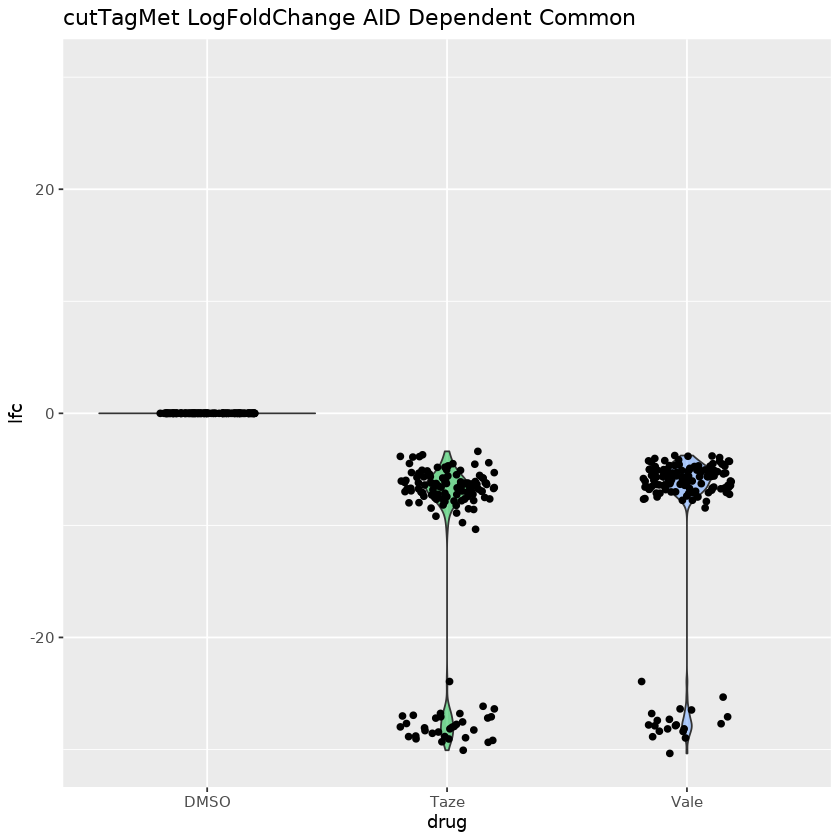

In [6]:
print("RAW Common ")
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
cutTagMet_newrpm=as.matrix(read.table(paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=","))
data=log2(cutTagMet_newrpm+1)

filterVale=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/sortNames/_5_DMSOVale.csv",header=TRUE,row.names=1,sep=",")))
filterVale=unlist(sapply(filterVale,FUN=function(x){toString(x)}))

filterTaze=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/sortNames/_2_DMSO_TAZE.csv",header=TRUE,row.names=1,sep=",")))
filterTaze=unlist(sapply(filterTaze,FUN=function(x){toString(x)}))

foldChange=list()
geneWide=cutTagMet_newrpm+0.000001


foldChange[[1]]=log2(geneWide[filterTaze,2]/geneWide[filterTaze,1])
foldChange[[2]]=log2(geneWide[filterVale,3]/geneWide[filterVale,1])


names(foldChange)=c("Taze","Vale")

foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(foldChange[[1]]))))
lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF,check.names=FALSE,fix.empty.names=FALSE)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle("cutTagMet LogFoldChange AID Dependent Common")
plot(pp)   

condition_of_interest1 = data[filterTaze,2]
condition_of_interest2 = data[filterVale,3]
reference_condition1 <- data[filterTaze,1]
reference_condition2 <- data[filterVale,1]

pvalueTAZE= wilcox.test(condition_of_interest1, reference_condition1,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition2,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")

[1] "filtered"
P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 1.138998e-11 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 1.672125e-10 


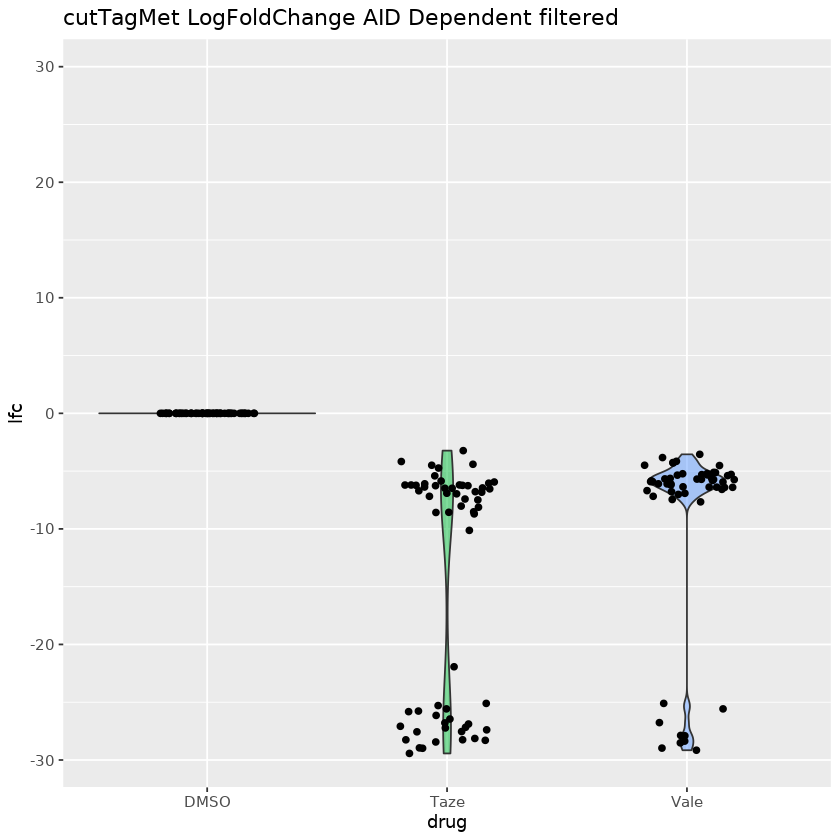

In [7]:
print("filtered")
#FIGURE 5B
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
cutTagMet_newrpm=as.matrix(read.table(paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=","))
data=log2(cutTagMet_newrpm+1)

filterVale=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/filtered_Lig_DMSOVale.csv",header=TRUE,row.names=1,sep=",")))
filterVale=unlist(sapply(filterVale,FUN=function(x){toString(x)}))

filterTaze=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/filtered_Lig_DMSOTaze.csv",header=TRUE,row.names=1,sep=",")))
filterTaze=unlist(sapply(filterTaze,FUN=function(x){toString(x)}))

foldChange=list()
geneWide=cutTagMet_newrpm+0.000001


foldChange[[1]]=log2(geneWide[filterTaze,2]/geneWide[filterTaze,1])
foldChange[[2]]=log2(geneWide[filterVale,3]/geneWide[filterVale,1])


names(foldChange)=c("Taze","Vale")

foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(foldChange[[1]]))))
lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF,check.names=FALSE,fix.empty.names=FALSE)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle("cutTagMet LogFoldChange AID Dependent filtered")
plot(pp)   

condition_of_interest1 = data[filterTaze,2]
condition_of_interest2 = data[filterVale,3]
reference_condition1 <- data[filterTaze,1]
reference_condition2 <- data[filterVale,1]

pvalueTAZE= wilcox.test(condition_of_interest1, reference_condition1,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition2,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")

In [8]:
data=as.matrix(read.table(paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=","))
condition_of_interest1 = data[filterTaze,2]
condition_of_interest2 = data[filterVale,3]
reference_condition1 <- data[filterTaze,1]
reference_condition2 <- data[filterVale,1]

pvalueTAZE= wilcox.test(condition_of_interest1, reference_condition1,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition2,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")


P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 1.138825e-11 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 1.671478e-10 


[1] "filtered Common"
RNA Tazemetostat Big vs Small t-test results:
No significant difference between the groups (p-value: 0.492174 )
RNA Valemetostat Big vs Small t-test results:
No significant difference between the groups (p-value: 0.4111699 )
Groseq Tazemetostat Big vs Small t-test results:
The groups are significantly different (p-value: 0.0001939008 )
Log2 fold change: -2.409268 
Groseq Valemetostat Big vs Small t-test results:
No significant difference between the groups (p-value: 0.4960868 )
[1] "BIG are > 20 , small are < 20"
[1] "negative log2foldchange means small has higher expression"
P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 2.384186e-07 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 1.192093e-07 


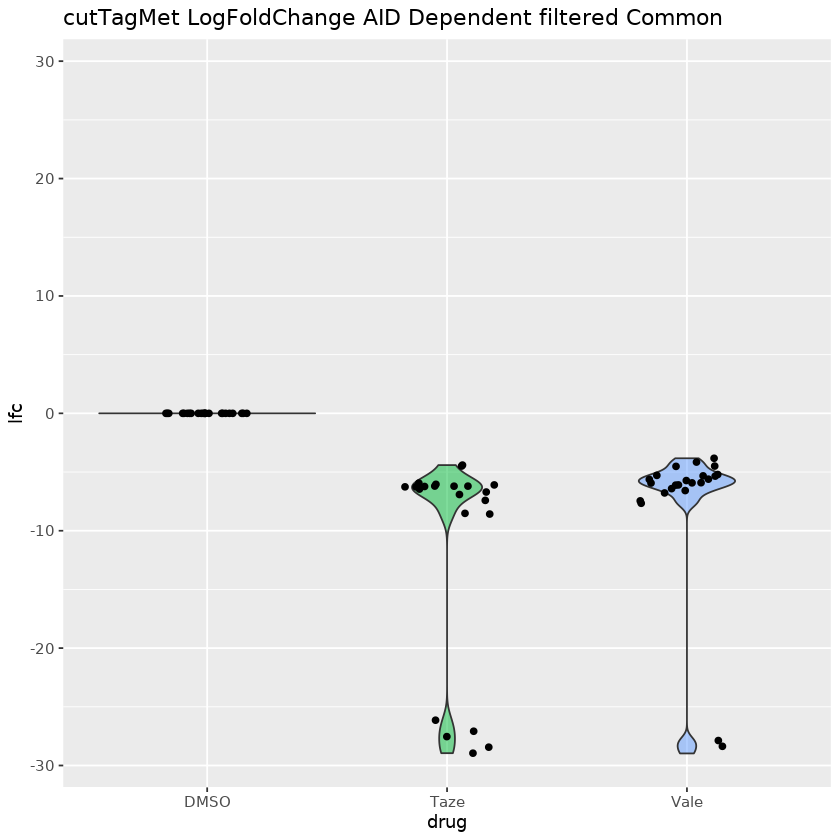

In [158]:
#FIGURE 7E
print("filtered Common")
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
cutTagMet_newrpm=as.matrix(read.table(paste(results,"/cutTagMet_AID_Heatmap_count.csv",sep=""),header=TRUE,row.names=1,sep=","))
data=log2(cutTagMet_newrpm+1)

filterVale=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/sortNames/_5_DMSOVale.csv",header=TRUE,row.names=1,sep=",")))
filterVale=unlist(sapply(filterVale,FUN=function(x){toString(x)}))

filterTaze=unique(rownames(read.table("/sharedFolder/Results/Ligase4/rpmPlot/filtered/sortNames/_2_DMSO_TAZE.csv",header=TRUE,row.names=1,sep=",")))
filterTaze=unlist(sapply(filterTaze,FUN=function(x){toString(x)}))

foldChange=list()
geneWide=cutTagMet_newrpm+0.000001


foldChange[[1]]=log2(geneWide[filterTaze,2]/geneWide[filterTaze,1])
foldChange[[2]]=log2(geneWide[filterVale,3]/geneWide[filterVale,1])


names(foldChange)=c("Taze","Vale")

foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(foldChange[[1]]))))
statRNA(foldChangeDF)
statGroseq(foldChangeDF)
print("BIG are > 20 , small are < 20")
print("negative log2foldchange means small has higher expression")
lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF,check.names=FALSE,fix.empty.names=FALSE)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle("cutTagMet LogFoldChange AID Dependent filtered Common")
plot(pp)   

condition_of_interest1 = data[filterTaze,2]
condition_of_interest2 = data[filterVale,3]
reference_condition1 <- data[filterTaze,1]
reference_condition2 <- data[filterVale,1]

pvalueTAZE= wilcox.test(condition_of_interest1, reference_condition1,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition2,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")




In [ ]:
Database=read.table(paste(previousResults,"Database_annotated.csv",sep="/"),header=TRUE,sep=",")
temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))>20),]
TazeBig=rownames(temp[which(temp[,2]=="Taze"),])
TazeBigAnnotated=c()
for(i in TazeBig){
TazeBigAnnotated=append(TazeBigAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
ValeBig=rownames(temp[which(temp[,2]=="Vale"),])
ValeBigAnnotated=c()
for(i in ValeBig){
ValeBigAnnotated=append(ValeBigAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}

temp=foldChangeDF[which(abs(as.numeric(foldChangeDF[,1]))<20),]
TazeSmall=rownames(temp[which(temp[,2]=="Taze"),])
TazeSmallAnnotated=c()
for(i in TazeSmall){
TazeSmallAnnotated=append(TazeSmallAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
ValeSmall=rownames(temp[which(temp[,2]=="Vale"),])
ValeSmallAnnotated=c()
for(i in ValeSmall){
ValeSmallAnnotated=append(ValeSmallAnnotated,Database[grep(i,Database[,"hotspotID"]),"annotation"])
}
TazeBigAnnotated=unique(TazeBigAnnotated)
ValeBigAnnotated=unique(ValeBigAnnotated)
TazeSmallAnnotated=unique(TazeSmallAnnotated)
ValeSmallAnnotated=unique(ValeSmallAnnotated)

RNA=read.table("/sharedFolder/Data/2_RNA_seq/_counts.txt",header=TRUE,row.names=1,sep="\t")
rownames(RNA)=toupper(rownames(RNA))
indexTazeBig=c()
for(i in c(TazeBigAnnotated,TazeSmallAnnotated)){
indexTazeBig=append(indexTazeBig,grep(i,rownames(RNA)))
}
indexTazeSmall=c()
for(i in c(TazeSmallAnnotated)){
indexTazeSmall=append(indexTazeSmall,grep(i,rownames(RNA)))
}
indexValeBig=c()
for(i in c(ValeBigAnnotated)){
indexValeBig=append(indexValeBig,grep(i,rownames(RNA)))
}
indexValeSmall=c()
for(i in c(ValeSmallAnnotated)){
indexValeSmall=append(indexValeSmall,grep(i,rownames(RNA)))
}
#bT=rowMeans(RNA[indexTazeBig,grep("TAZ",colnames(RNA))])
#sT=rowMeans(RNA[indexTazeSmall,grep("TAZ",colnames(RNA))])
#bV=rowMeans(RNA[indexValeBig,grep("Vale",colnames(RNA))])
#sV=rowMeans(RNA[indexValeSmall,grep("Vale",colnames(RNA))])
    
bT=RNA[indexTazeBig,grep("TAZ",colnames(RNA))]
sT=RNA[indexTazeSmall,grep("TAZ",colnames(RNA))]
bV=RNA[indexValeBig,grep("Vale",colnames(RNA))]
sV=RNA[indexValeSmall,grep("Vale",colnames(RNA))]
t_test_Taze <- t.test(bT, sT)

# Calcola il t-test per Valemetostat
t_test_Vale <- t.test(bV, sV)

log2_fold_change_Taze <- log2(mean(bT) / mean(sT))
log2_fold_change_Vale <- log2(mean(bV) / mean(sV))    
    
# Print results for Tazemetostat
cat("RNA Tazemetostat Big vs Small t-test results:\n")
if(t_test_Taze$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Taze$p.value, ")\n")
  cat("Log2 fold change:", log2_fold_change_Taze, "\n")
} else {
  cat("No significant difference between the groups (p-value:", t_test_Taze$p.value, ")\n")
}

# Print results for Valemetostat
cat("RNA Valemetostat Big vs Small t-test results:\n")
if(t_test_Vale$p.value < 0.05) {
  cat("The groups are significantly different (p-value:", t_test_Vale$p.value, ")\n")
 cat("Log2 fold change:", log2_fold_change_Vale, "\n")
    
} else {
  cat("No significant difference between the groups (p-value:", t_test_Vale$p.value, ")\n")
}